### Import libraries

In [10]:
from keras.models import Sequential
from keras.layers import Dense, activations
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

### Handle missing values

In [4]:
df=pd.read_csv('pubg.csv')
df.dropna(inplace=True)

### Drop unwanted columns

In [5]:
df.drop(['Id', 'groupId', 'matchId'],axis=1,inplace=True)

### Handle categorial values

In [6]:
df=pd.get_dummies(df,drop_first=True)

### Split data into train and test sets

In [7]:
X=df.drop('winPlacePerc',axis=1)
y=df['winPlacePerc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Build the model

In [8]:
model=Sequential()
model.add(Dense(units=39,input_dim=39,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=20,input_dim=20,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=1,activation='linear',kernel_initializer='normal'))
model.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
model.summary()

W0911 23:20:19.760803  9088 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 23:20:19.819274  9088 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 23:20:19.834112  9088 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0911 23:20:19.894138  9088 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 39)                1560      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                800       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,381
Trainable params: 2,381
Non-trainable params: 0
_________________________________________________________________


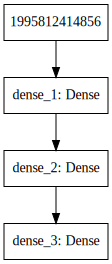

In [11]:
plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [12]:
model.fit(X_train,y_train,epochs=10,batch_size=50)

W0911 23:54:13.567731  9088 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0911 23:54:13.672641  9088 deprecation_wrapper.py:119] From C:\Users\aliba\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
2979466/2979466 [==============================] - 56s 19us/step - loss: 0.0780 - mean_absolute_error: 0.0780
Epoch 2/10
2979466/2979466 [==============================] - 53s 18us/step - loss: 0.0702 - mean_absolute_error: 0.0702
Epoch 3/10
2979466/2979466 [==============================] - 54s 18us/step - loss: 0.0686 - mean_absolute_error: 0.0686
Epoch 4/10
2979466/2979466 [==============================] - 53s 18us/step - loss: 0.0677 - mean_absolute_error: 0.0677
Epoch 5/10
2979466/2979466 [==============================] - 54s 18us/step - loss: 0.0672 - mean_absolute_error: 0.0672
Epoch 6/10
2979466/2979466 [==============================] - 53s 18us/step - loss: 0.0665 - mean_absolute_error: 0.0665
Epoch 7/10
2979466/2979466 [==============================] - 56s 19us/step - loss: 0.0659 - mean_absolute_error: 0.0659
Epoch 8/10
2979466/2979466 [==============================] - 55s 18us/step - loss: 0.0656 - mean_absolute_error: 0.0656
Epoch 9/10
2979466/2979466 [====

### Evaluate the model

In [15]:
# MAE on the test set
mae=model.evaluate(X_test,y_test)[1]

1467499/1467499 [==============================] - 16s 11us/step


In [16]:
mae

0.0645458252076092